In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [2]:
#loading the data from csv
car_dataset = pd.read_csv('E:/OIBSIP/Datasets/car data.csv')

In [3]:
# first 5 rows
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [47]:
# checking the number of rows and columns
car_dataset.shape

(301, 9)

In [5]:
# getting some info
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
#checking the number of missing values
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [8]:
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Owner.value_counts())
print(car_dataset.Transmission.value_counts())
print(car_dataset.Selling_type.value_counts())
print(car_dataset.Car_Name.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
0    290
1     10
3      1
Name: Owner, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64
Dealer        195
Individual    106
Name: Selling_type, dtype: int64
city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: Car_Name, Length: 98, dtype: int64


In [9]:
car_dataset.replace({"Fuel_Type":{'Diesel':0,'Petrol':1,'CNG':2,'LPG':3,'Electric':4},"Owner":{'First Owner':0,'Second Owner':1,'Third Owner':2,'Fourth & Above Owner':3,'Test Drive Car':4},"Transmission":{'Manual':0,'Automatic':1},"Selling_type":{'Individual':0,'Dealer':1,'Trustmark Dealer':2}},inplace=True)
     

In [11]:
X = car_dataset.drop(columns=['Car_Name','Selling_Price'],axis=1)
Y = car_dataset['Selling_Price']

In [12]:
X.head()

,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,5.59,27000,1,1,0,0
1,2013,9.54,43000,0,1,0,0
2,2017,9.85,6900,1,1,0,0
3,2011,4.15,5200,1,1,0,0
4,2014,6.87,42450,0,1,0,0


In [13]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

In [14]:
print(X_train.shape , X_test.shape , X.shape)

(240, 7) (61, 7) (301, 7)


In [15]:
#Model Training using Linear Regression
lin_reg_mode = LinearRegression()

In [16]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

In [17]:
#Prediction on training data
training_data_prediction=lin_reg_model.predict(X_train)

In [18]:
#R squared error
error_score = metrics.r2_score(Y_train,training_data_prediction)
print("R Squared Error: ",error_score )

R Squared Error:  0.8818575124789287


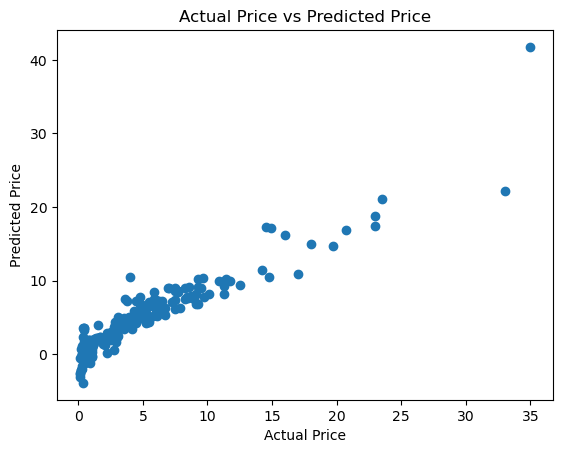

In [19]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title("Actual Price vs Predicted Price")
plt.show()

In [20]:
testing_data_prediction = lin_reg_model.predict(X_test)

In [21]:
error_score2 = metrics.r2_score(Y_test,testing_data_prediction)
print("R Squared Error: ",error_score2 )

R Squared Error:  0.8608177934831838


In [22]:
#loading the kinear regression model
las_reg_model = Lasso()

In [23]:
las_reg_model.fit(X_train,Y_train)

Lasso()

In [28]:
training_data=las_reg_model.predict(X_train)
error_score=metrics.r2_score(Y_train,training_data)
print("R squared Error: ",error_score)

R squared Error:  0.8414050122943975


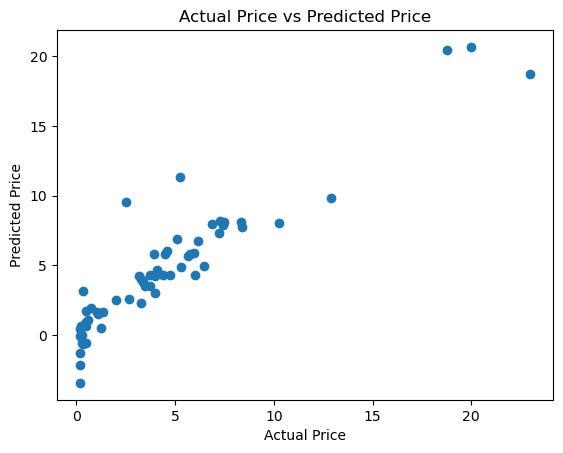

In [30]:
plt.scatter(Y_test,testing_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title("Actual Price vs Predicted Price")
plt.show()

In [31]:
from sklearn.ensemble import RandomForestRegressor

regressor=RandomForestRegressor(n_estimators=500)
#training the model
regressor.fit(X_train,Y_train)


RandomForestRegressor(n_estimators=500)

In [32]:
test_data_prediction_rfr = regressor.predict(X_test)

In [33]:
error_score_rfr = metrics.r2_score(Y_test , test_data_prediction_rfr)
print('R Squared Error:', error_score_rfr)

R Squared Error: 0.8986502180891043


In [38]:
input_data=(2013,4.5,3240,1,0,0,1)


#changing the input data to numpy
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array as we are predicting on 1 instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = lin_reg_model.predict(input_data_reshaped)

print('The Predcited price of Car : ', prediction[0])
     

The Predcited price of Car :  2.203365079085984


C:\Users\shree\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [42]:
#Saving the File
import pickle
filename = "car_price_prediction_model.sav"
pickle.dump(regressor , open(filename,'wb'))
#loading. the saved model
loaded_model = pickle.load(open('car_price_prediction_model.sav','rb'))

In [43]:
input_data=(2013,2.4,3240,1,0,0,1)


#changing the input data to numpy
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array as we are predicting on 1 instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)

print('The Predcited price of Car : ', prediction[0])

The Predcited price of Car :  1.6402


C:\Users\shree\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


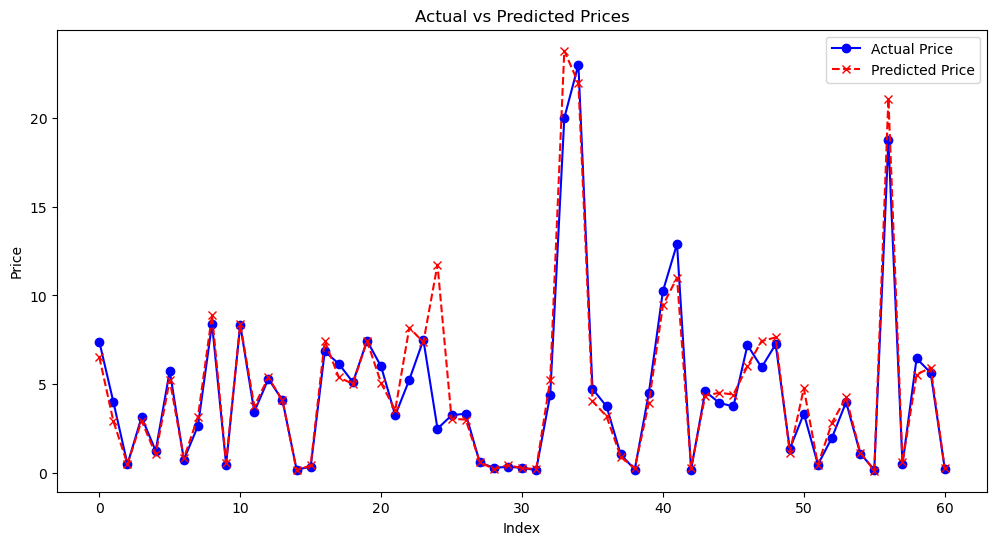

In [44]:
#graphical analysis of actual price and predicted price with different colors for actual and predicted price

indices = range(len(Y_test))
plt.figure(figsize=(12, 6))
plt.plot(indices, Y_test, color='blue', marker='o', linestyle='-', label='Actual Price')
plt.plot(indices, test_data_prediction_rfr, color='red', marker='x', linestyle='--', label='Predicted Price')
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()

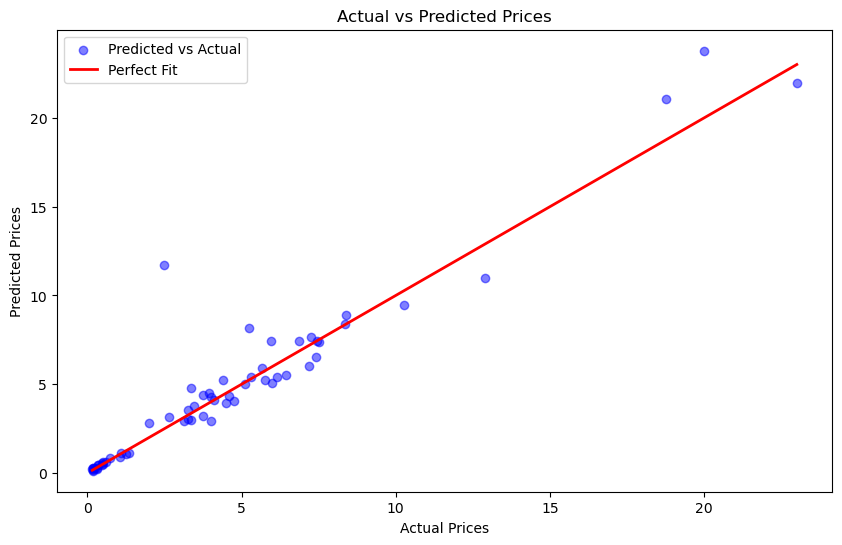

In [45]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, test_data_prediction_rfr, color='blue', alpha=0.5, label='Predicted vs Actual')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linewidth=2, label='Perfect Fit')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()